<a href="https://colab.research.google.com/github/nitanurqarinah/alia/blob/main/Tugas_Wireless_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f = 1800 #Mhz
tower=80 #meter
user=1.5 #meter
dmin = 200 #meter
dmax = 700 #meter
N = 200 
d = np.random.randint(dmin,dmax,N)

LpUrban = cos(f,'urban',tower,user,d)
LpSuburban = cos(f,'suburban',tower,user,d)
LpOpen = cos(f,'open',tower,user,d)

d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

### Gambar 1

In [4]:
def Preceive(Ptx,PL,Gtx,Grx) :
  Prx = Ptx - PL + Gtx + Grx
  return Prx

In [5]:
NtL = lambda x: 10*np.log10(x)

DayaTx = NtL(30) #dBm
GainTx= 10 #dB
GainRx = 2 #dB

PrxUrban = Preceive(DayaTx,Urban_sort,GainTx,GainRx)
PrxSuburban = Preceive(DayaTx,Suburban_sort,GainTx,GainRx)
PrxOpen = Preceive(DayaTx,Open_sort,GainTx,GainRx)

LtN = lambda x: 10**(x/10)

PrxUrban1 = LtN(PrxUrban)
PrxSuburban1 = LtN(PrxSuburban)
PrxOpen1 = LtN(PrxOpen)

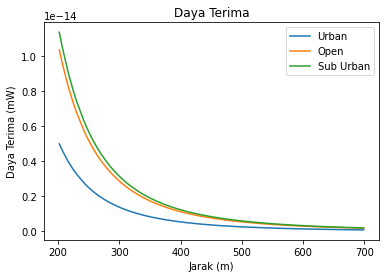

In [6]:
plt.figure()
plt.plot(d_sort,PrxUrban1, label = "Urban") #x,y
plt.plot(d_sort,PrxOpen1, label = "Open")
plt.plot(d_sort,PrxSuburban1,label = "Sub Urban")
plt.legend()
plt.title("Daya Terima")
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

### Gambar 2

In [7]:
LpUrban1 = cos(700,'urban',tower,user,d)
LpUrban2 = cos(900,'suburban',tower,user,d)
LpUrban3 = cos(1800,'open',tower,user,d)

d_sort=d[np.argsort(d)]
Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

In [8]:
PrxU700 = Preceive(DayaTx,Urban1_sort,GainTx,GainRx)
PrxU900 = Preceive(DayaTx,Urban2_sort,GainTx,GainRx)
PrxU1800 = Preceive(DayaTx,Urban3_sort,GainTx,GainRx)

LtN = lambda x: 10**(x/10)

PrxU7001 = LtN(PrxU700)
PrxU9001 = LtN(PrxU900)
PrxU18001 = LtN(PrxU1800)

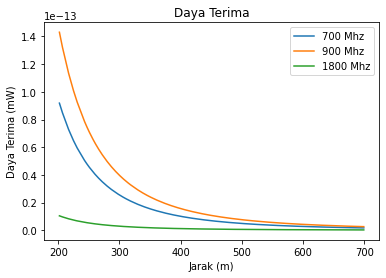

In [9]:
plt.figure()
plt.plot(d_sort,PrxU7001, label = "700 Mhz") #x,y
plt.plot(d_sort,PrxU9001,label = "900 Mhz")
plt.plot(d_sort,PrxU18001, label = "1800 Mhz")
plt.legend()
plt.title("Daya Terima")
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.show()

### Gambar 3

In [10]:
def ratio(Prx, Bw) :
  Noise = -174 + 10*np.log10(Bw)
  No = LtN(Noise)
  SNR = Prx/No
  return SNR

In [11]:
bandwidth = 5000#Hz

SNRUrban = ratio(PrxUrban1, bandwidth)
SNRSuburban = ratio(PrxSuburban1, bandwidth)
SNROpen = ratio(PrxOpen1, bandwidth)

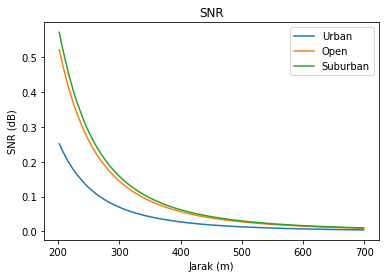

In [12]:
plt.figure()
plt.plot(d_sort,SNRUrban, label = "Urban") #x,y
plt.plot(d_sort,SNROpen, label = "Open")
plt.plot(d_sort,SNRSuburban,label = "Suburban")
plt.legend()
plt.title("SNR")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

### Gambar 4

In [13]:
SNRU700 = ratio(PrxU7001, bandwidth)
SNRU900 = ratio(PrxU9001, bandwidth)
SNRU1800 = ratio(PrxU18001, bandwidth)

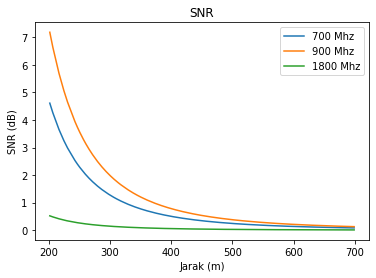

In [17]:
plt.figure()
plt.plot(d_sort,SNRU700, label = "700 Mhz") #x,y
plt.plot(d_sort,SNRU900,label = "900 Mhz")
plt.plot(d_sort,SNRU1800, label = "1800 Mhz")
plt.legend()
plt.title("SNR")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

### Gambar 5

In [15]:
def kapasitas(SNR,BW) :
  cap = BW * np.log2(1+SNR)
  return cap

In [18]:
CAPUrban = kapasitas(SNRUrban, bandwidth)
CAPSuburb = kapasitas(SNRSuburban, bandwidth)
CAPOpen = kapasitas(SNROpen, bandwidth)

In [ ]:
plt.figure()
plt.plot(d_sort,CAPUrban, label = "Urban") #x,y
plt.plot(d_sort,CAPOpen, label = "Open")
plt.plot(d_sort,CAPSuburb,label = "Suburban")
plt.legend()
plt.title("Kapasitas")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

### Gambar 6

In [19]:
CAPU700 = kapasitas(SNRU700, bandwidth)
CAPU900 = kapasitas(SNRU900, bandwidth)
CAPU1800 = kapasitas(SNRU1800, bandwidth)

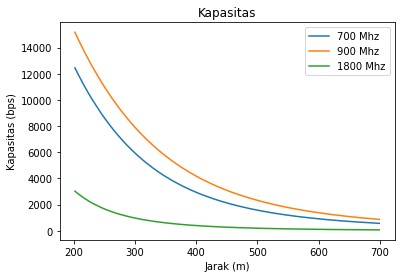

In [20]:
plt.figure()
plt.plot(d_sort,CAPU700, label = "700 Mhz") #x,y
plt.plot(d_sort,CAPU900,label = "900 Mhz")
plt.plot(d_sort,CAPU1800, label = "1800 Mhz")
plt.legend()
plt.title("Kapasitas")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()
